# Árboles de Decisión

* Fáciles de entender y exactos para predecir (*White Boxes*).
* Los árboles de decisión pueden hacer clasificación, regresión y multiclasificación. 
* Constituyen la componente fundamental de los __Bosques Aleatorios (RF por sus siglas en Inglés)__.
* Una importante ventaja que presentan es que no es necesario estandarizar las variables.

<img src=Imagenes/tree.png /> 

En este primer ejemplo tenemos un árbol que predice el precio de una casa. Parte de la variable *Bedrooms* que corresponde al número de dormitorios, impone un valor corte de 2 y si la casa tiene 2 cuartos, entonces asigna el precio de 188,000 dólares y si no asigna el precio de 178,000 dólares.

Un árbol un tanto más complejo se vería así:

<img src=Imagenes/leafs.png /> 

En este caso tenemos dos niveles, primero se fija en la variable bedroom para hacer la misma partición del ejemplo pasado, y luego se fija en el área del lote para crear más categorías. 

* El árbol de decisión toma las variables, las divide en categorías y a cada categoría le asigna un precio. 
* El modelo aprende de un conjunto de datos de entrenamiento para encontrar estas relaciones.
* El árbol tiene ramas y no sólo se fija en una sola variable, sino que va categorizando con base en varias de ellas.
* El final de las clasficaciones recibe el nombre de __hoja__.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preporcesamiento
from sklearn.model_selection import train_test_split
#Evaluacion
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

#ML
from sklearn.tree import DecisionTreeClassifier

#DataViz
import scikitplot as skplt
import seaborn as sns
font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)

# interpretación de árboles
from sklearn.tree import export_graphviz

Trabajaremos con el *dataset* de **Iris**.

Esta es una base de datos que contiene medidas de tres especies diferentes de la planta floreada Iris. Una de las especies es linealmente separable de las otras dos y las otras no son linealmente separables entre ellas (en esta clase veremos lo que eso significa).

<img src="Imagenes/DT1.png" width = 500>

En esta foto el pétalo y el sépalo de la flor son del mismo color lo que invita a la confusión, así que les pongo la foto de otra flor donde el concepto es más digerible. 😅😅😅😅

<img src="Imagenes/DT2.jpg" width = 300>

In [2]:
df = pd.read_csv('Datos/Iris.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No tenemos valores nulos en la base. Busquemos valores duplicados:

In [4]:
df.duplicated().sum()

3

In [5]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Seguramente sólo son flores que miden lo mismo, así que los dejaremos ahí.

# AED

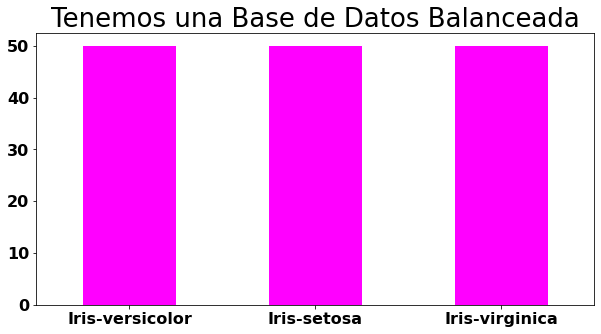

In [6]:
plt.figure(figsize=(10,5))
df.Species.value_counts().plot.bar(rot=0, color='magenta')
plt.title("Tenemos una Base de Datos Balanceada", fontsize = 26);

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
plt.style.use("seaborn-poster")

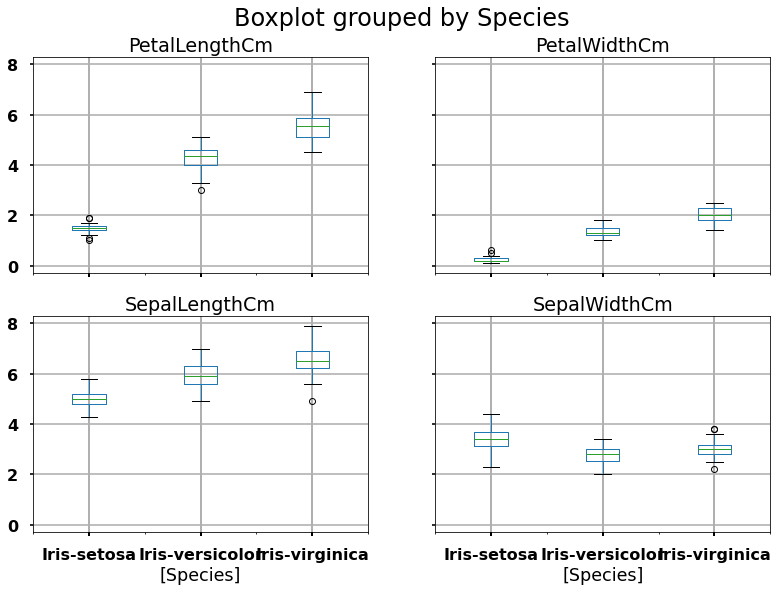

In [10]:
df.boxplot(by='Species',grid=True);

Vamos a ahorrar tiempo y grafiquemos todos los gráficos de dispersión e histogramas con los registros clasificados por especie:

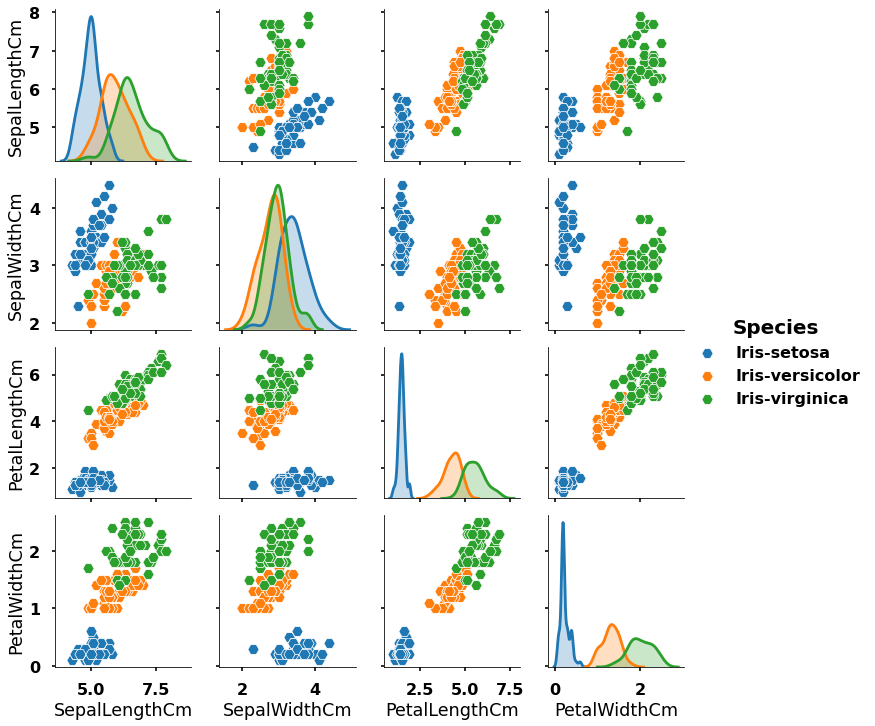

In [11]:
sns.pairplot(df, hue='Species', markers='H');

¿Cuál de las variables creen que va a ser "la buena" para separar las especies de Iris?

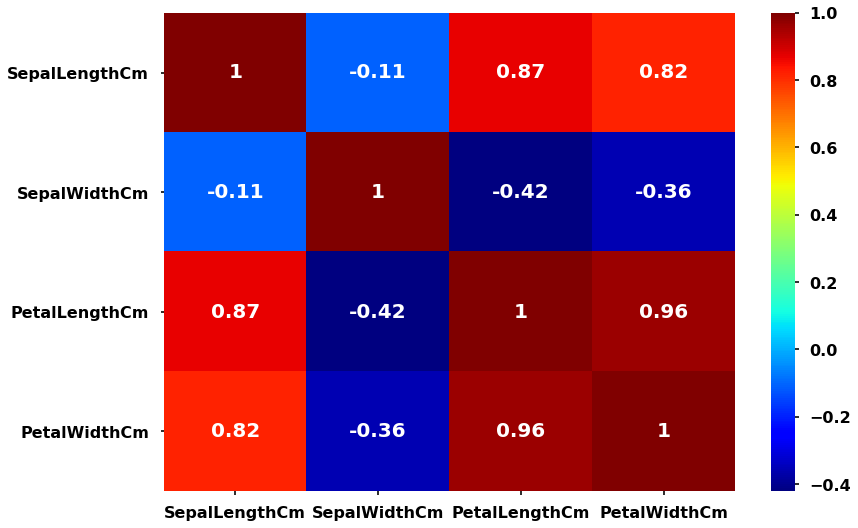

In [12]:
sns.heatmap(df.corr(),cmap='jet', annot=True);

¿Qué opinan de estas correlaciones? ¿Creen que podrían afectar al performance del modelo?

# Preparación de Datos

Escogiendo las columnas para las variables predictoras (independientes) que usaremos en el entrenamiento:

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
x = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Entrenamiento

Vamos a entrenar con todos los datos para propósitos únicamente de interpretación

In [15]:
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(df[x],df['Species'])

DecisionTreeClassifier(max_depth=2)

La máxima profundidad se refiere al número máximo de niveles que permitirá el árbol.

# Interpretación

Es posible dibujar los árboles a partir del modelo entrenado utilizando el método gráfico *plot_tree*:

In [16]:
from sklearn.tree import plot_tree

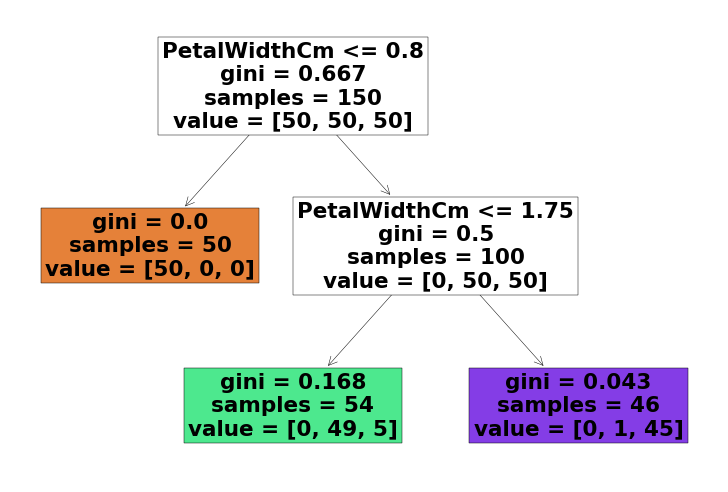

In [17]:
plt.figure()
plot_tree(model_tree, filled=True, feature_names= x)
plt.show()

¿Cómo predice un árbol de decisión?

En cada nodo se selecciona la variable así como el valor que separó lo *mejor posible* los datos utilizando como criterio la Impureza de Gini.

<img align="center" src = "Imagenes\DT3.jpg" >

La Impureza de Gini $G_i$ es una métrica que evalúa que tan bien nuestro árbol separó los datos. Si $G_i = 0$ el nodo es puro lo que quiere decir que los datos se separaron sin error alguno (e.g. todos los pokémons estándar quedaron del lado "correcto"). 

Matemáticamente, la Impureza de Gini se define:

$G_i = 1 - \sum{p_{i,k}^2}$ 

Donde $p_{i,k}$ corresponde al cociente del número de instancias de la clase k entre el número total de muestras.

A continuación un ejemplo con uno de los nodos de nuestro modelo:

<img src = "Imagenes\DT4.jpg" width = 500>

* samples: número de datos que se asignaron al corte
* value: vector con el número de registros que quedaron en cada categoría.
* gini: impureza de Gini en el nodo

In [18]:
n = 0+49+5
p_i = 0 # estándar
p_j = 49
p_k = 5 # legendarios
G_i = round(1-(p_i/n)**2-(p_j/n)**2-(p_k/n)**2, 3)
G_i_p = G_i * 100
print("Impureza de Gini asociada al nodo circulado:", G_i)
print("Tenemos una probabilidad del",str(G_i_p)+" % de clasificar mal una planta Iris si cae en este nodo")

Impureza de Gini asociada al nodo circulado: 0.168
Tenemos una probabilidad del 16.8 % de clasificar mal una planta Iris si cae en este nodo


¿Cómo se selecciona la mejor manera para partir los datos?

Con una función de costo.

La función de costo del árbol de decisión busca optimizar la selección de la variable $k$ y el umbral $t_k$ y es representada por la siguiente ecuación matemática.

$C(k,t_k) = \frac{m_{izq}}{m}G_{izq} + \frac{m_{der}}{m}G_{der}$ 

Donde $G_{izq/der}$ mide la impureza del conjunto de la izquierda o derecha, $m_{izq/der}$ corresponde al número de instancias en el conjunto de la izquierda o derecha y $m = m_{izq} + m_{der}$.

<img src = "Imagenes\DT5.jpg" width = 800>



Esta función de costo parte los datos recursivamente hasta una cierta profundidad regulada por el parámetro *max_depth* o hasta que no se pueda reducir más la impureza y, por consiguiente, haya alcanzado su mínimo.

**¿Cuánto vale la función de costo en el nodo marcado?**

--------------------------------------------

# Importancia Relativa 

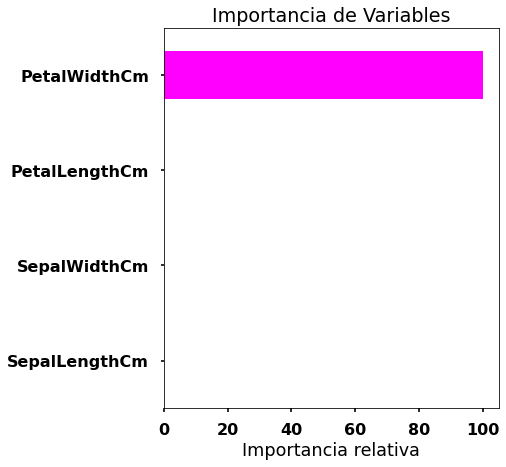

In [19]:
#DF de variables mas importantes
f_imp = pd.DataFrame(model_tree.feature_importances_,
                     index=x, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');

# Train Test Split, Entrenamiento y Evaluación del Modelo

Partiendo en *train* y *test*:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[x], df['Species'], 
                                                    test_size=0.2, random_state = 10)

In [21]:
model_tree = DecisionTreeClassifier(max_depth=5)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

Ahora veamos las predicciones:

In [22]:
y_hat_tree = model_tree.predict(X_test)
y_hat_tree[0:10]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

Literal nos devuelve la especie asignada. 😮😮😮😮

In [23]:
print(classification_report(y_test,y_hat_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Veamos la matriz de confusión:

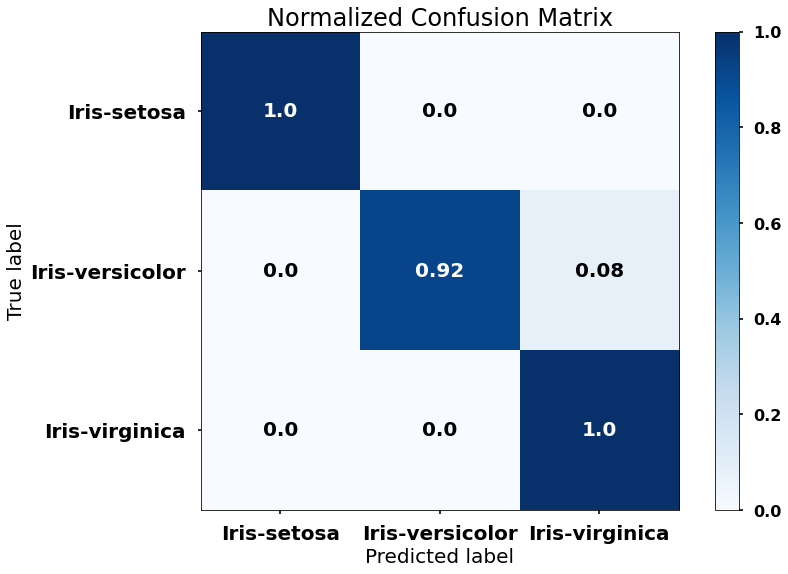

In [24]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_tree,normalize=True);

## ¿Que tal si simplemente aumentamos mucho la profundidad para que parta totalmente los datos y nos clasifique todo bien?

Probemos con profundidad 35:

In [25]:
model_tree_depth = DecisionTreeClassifier(max_depth = 35)
model_tree_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=35)

In [26]:
y_hat_tree_depth = model_tree_depth.predict(X_test)

In [27]:
print(classification_report(y_test,y_hat_tree_depth))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



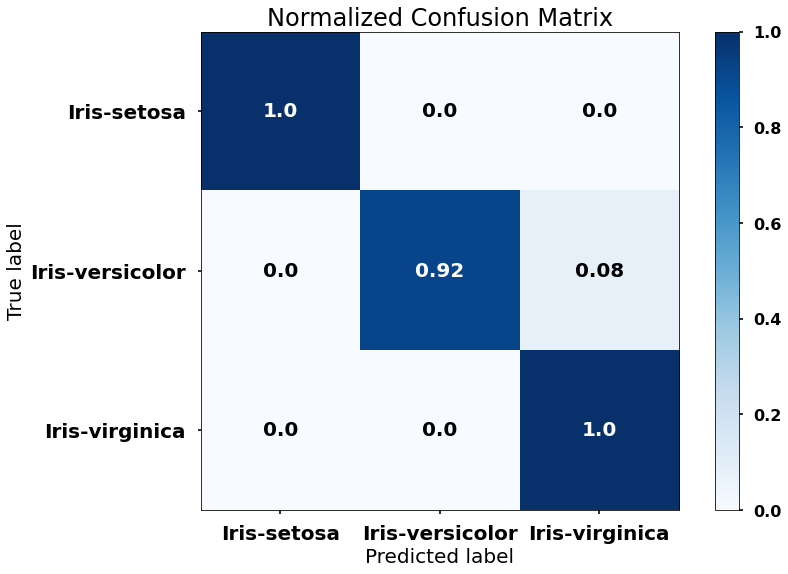

In [28]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_tree_depth, normalize=True);

El modelo no mejoró en absoluto con la profundidad 35, ¿por qué?

Vamos a discutirlo.

Primero que nada es posible que el algoritmo haya truncado el número de nodos. Vamos a comprobarlo:

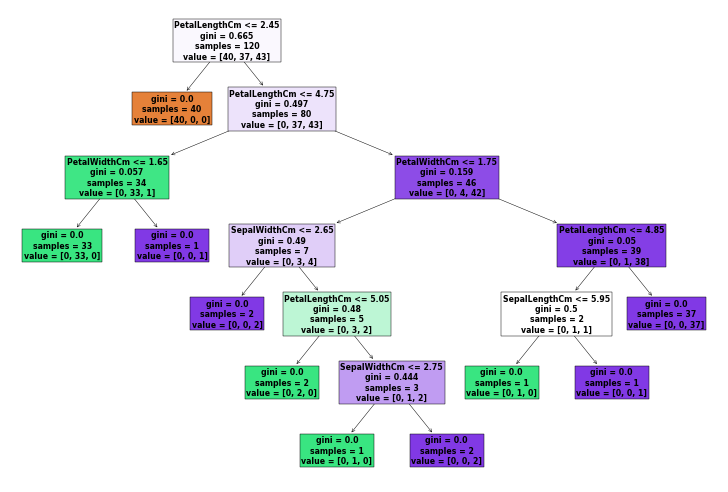

In [29]:
plt.figure()
plot_tree(model_tree_depth, filled=True, feature_names= x)
plt.show()

Efectivamente, el árbol está truncado.

Otra cosa que tenemos que tomar en consideración es que los árboles de decisión son **separadores lineales** y dos de las especies con las que estamos trabajando NO son separables linealmente. Además, llevar al algoritmo a una profundidad tan grande puede desembocar en *overfiting*.

# Fronteras de Decisión

Ahora hablemos de fronteras de decisión, pero, primero, algunos ejemplos. El siguiente es un árbol de decisión que determina si una persona es alta, mediana o pequeña:

<img src="Imagenes/DT6.jpg">

Las fronteras de decisión sólo pueden visualizarse en *datasets* con no más de 3 varaibles predictoras, por lo que no tendremos problemas en hacerlo con el árbol anterior.

¿Cómo funciona?

* Hacemos un gráfico con nuestras dos variables predictoras (sexo y altura)
* Nos fijamos en la primera decisión que toma el árbol (si es hombre o mujer) y dibujamos la primera frontera decisión (línea vertical donde de un lado quedan todos los hombres y del otro quedan todas las mujeres)
* Nos ubicamos en alguna de las dos ramas, por ejemplo, la rama de las mujeres.
* Vamos al eje de las alturas y graficamos las fronteras de decisión correspondientes.
* Todo lo que quede arriba de 1.8 m, será clasificado como alta, todo lo que quede abajo de 1.3 m será clasificado como baja y todo lo que quede en medio como mediana.
* Repetimos exactamente el mismo procedimiento para la rama de los hombres.

<img src="Imagenes\DT7.jpg">

Ahora, cada que metamos un nuevo registro al árbol de decisión, basta con ver en qué zona del gráfico cayó para saber si es altx, medianx o bajx.

Por la naturaleza de los árboles de decisión, es decir, sólo fijarse en una variable por nodo, **las fronteras de decisión sólo pueden ser HORIZONTALES o VERTICALES** lo que limitará a estos modelos en una amplia gamma de problemas (hablaremos más a fondo respecto a esto la próxima clase).

## Pequeño Paréntesis: Árboles de Decisión para resolver problemas de regresión

¿Cómo resuelven los árboles problemas de regresión? Imaginen que tenemos el mismo gráfica de arriba, pero ahora con casas grandes, pequeñas y medianas y el objetivo es predecir el precio de una casa.

<img src="Imagenes\DT8.jpg" width = 700>

En este caso, para asginarle precio a una casa, el algoritmo se fijará en todas las casas que cayeron en cada una de las zonas, por ejemplo, nos fijamos en todas las casas de Iztapalapa del conjunto de entrenamiento que cayeron en la zona "Pequeñas", se calcula el promedio y, si un nuevo registro cae en esa zona, entonces se le asigna ese precio.

Esta forma de resolver un problema de regresión es MUY burda por lo que NO se recomienda usar árboles para resolver problemas de regresión.

## Fronteras de Decisión para el dataset de Iris

Ahora dibujaremos las fronteras de decisión para la base de datos de las flores.

Dado que sólo se pueden visualizar fronteras de decisión para cuando se usan DOS variables predictoras, entrenaremos árboles sólo con dos variables y dibujaremos sus respectivas fronteras de decisión.

Veamos que pasa con las fronteras si variamos la profundidad de los árboles.

In [30]:
from sklearn.datasets import load_iris # se importa el dataset de iris de la biblioteca sklearn, 
# se hace así porque así lo hacía el código de donde me lo robé :V

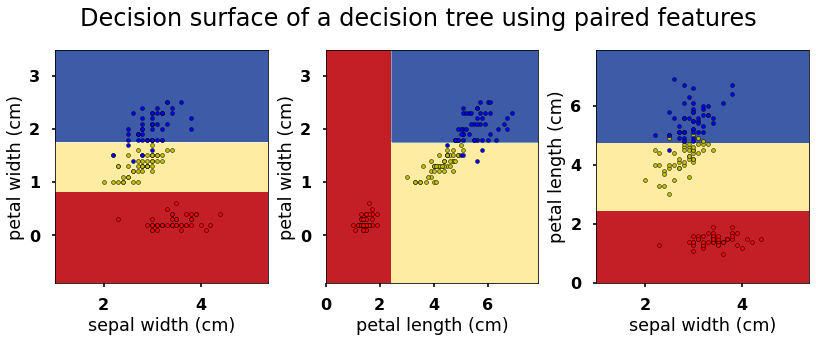

In [31]:
# Parameters
n_classes = 3 # número de clases a predecir
plot_colors = "ryb" #colores que usarán para pintar las fronteras y regiones
plot_step = 0.02 # resolución
max_depth_n = 2 # máxima profundidad permitida por el algoritmo

# Load data
iris = load_iris() # se cargan los datos

for pairidx, pair in enumerate([[1, 3], [2, 3],[1,2]]): # El par de columnas que se usará para entrenar cada modelo
    # We only take the two corresponding features
    X = iris.data[:, pair] # Se selecciona el par de columnas
    y = iris.target # se selecciona la variable objetivo

    # Train
    clf = DecisionTreeClassifier(max_depth=max_depth_n).fit(X, y) # Se entrena el modelo con los parámetros especificados

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1) # subplot es para desplegar distintas gráficas de forma secuencial

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Aquí está generando el mallado sobre el que se construirá el gráfico
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Hace predicciones sobre el mallado para determinar las zonas de clasificación
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # Dibuja los contornos y asigna los colores correspondientes

    plt.xlabel(iris.feature_names[pair[0]]) # le pone las etiquetas correspondientes a los ejes
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15) # Agrega el gráfico de dispersión de los puntos con los que entrenó el modelo

plt.suptitle("Decision surface of a decision tree using paired features")
#plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight");

# Grid Search
Para encontrar el óptimo global existen diversas técnicas para encontrar los mejores parámetros para dar con este óptimo, por lo que básicamente se hace una búsqueda por metaparámetros:

In [ ]:
!pip install -U sklearn 

# Aquí va Grid Search para Multiclase

# Apéndice: Técnicas de Desbalanceo (Código Bonito)

In [ ]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

## UnderSample

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');


## OverSample

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

## ImbLearn

In [ ]:
import imblearn

Random under-sampling and over-sampling with imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)


Under-sampling: Tomek links

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)


Under-sampling: Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

Over-sampling: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)


Over-sampling followed by under-sampling

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)